In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import itertools
import numpy as np

# Basic Model

## Data preparation

In [36]:
df = pd.read_csv("../data/prices_scores_clean.csv")
df = df.rename(columns={"Unnamed: 0": "ds","price":"y"})
df['ds'] = pd.to_datetime(df['ds'])
df = df.drop_duplicates().reset_index(drop=True)
basic_df = df.drop(columns=["BTC_score","twitter_score","reddit_score"])

In [37]:
basic_df

,ds,y
0,2018-02-01,9052.5763
1,2018-02-02,8827.6300
2,2018-02-03,9224.3913
3,2018-02-04,8186.6488
4,2018-02-05,6914.2600
...,...,...
1091,2021-01-27,30425.3933
1092,2021-01-28,33420.0450
1093,2021-01-29,34264.0100
1094,2021-01-30,34324.2717


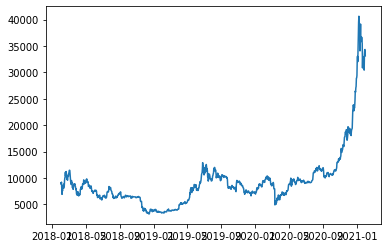

In [4]:
plt.plot(basic_df["ds"],basic_df["y"])

In [5]:
train = basic_df.iloc[:1066]
test = basic_df.iloc[1066:]

In [6]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
horizon = 30
future = model.make_future_dataframe(horizon)
forecast = model.predict(future)

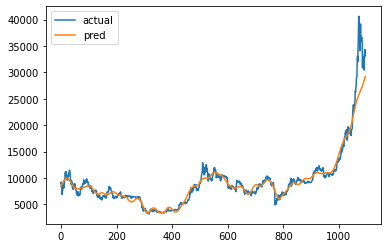

In [12]:
plt.plot(basic_df["y"], label="actual")
plt.plot(forecast["yhat"], label="pred")
plt.legend()

check here why is there a break from test plot

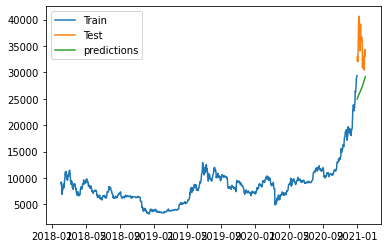

In [13]:
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")

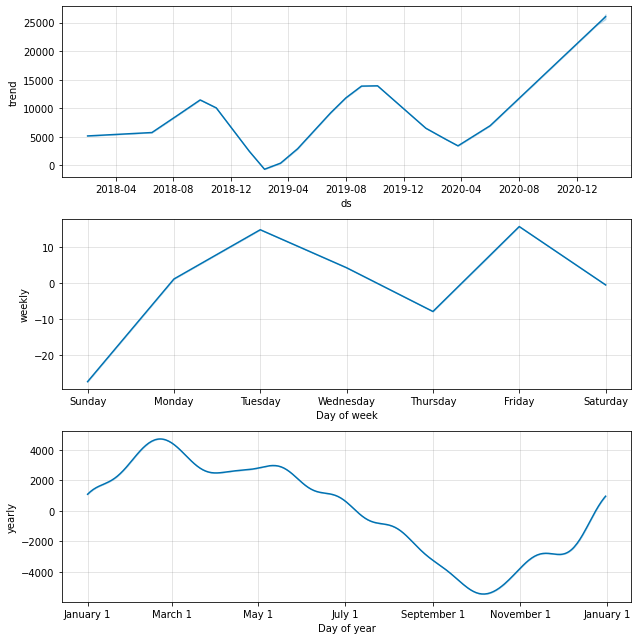

In [14]:
model.plot_components(forecast);

In [15]:
cv_results = cross_validation(model=model, initial=f'{70 * 5} days', horizon='30 days',
                              period='35 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2019-02-06 00:00:00 and 2020-12-02 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [16]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-07,3769.824341,3321.076348,4236.622194,3385.9700,2019-02-06
1,2019-02-08,3874.644766,3435.041453,4378.665165,3657.4017,2019-02-06
2,2019-02-09,4011.044595,3544.349129,4481.421214,3654.3000,2019-02-06
3,2019-02-10,4129.718132,3658.469431,4623.231362,3681.0517,2019-02-06
4,2019-02-11,4255.919451,3786.821313,4715.969513,3621.0283,2019-02-06
...,...,...,...,...,...,...
595,2020-12-28,15520.476531,14428.571394,16544.038829,27041.8667,2020-12-02
596,2020-12-29,15642.006104,14569.039542,16883.524615,27353.9783,2020-12-02
597,2020-12-30,15724.389927,14614.624430,16985.386690,28886.0400,2020-12-02
598,2020-12-31,15778.887460,14560.350838,16931.945981,28956.2650,2020-12-02


In [17]:
performance_metrics(cv_results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.817758e+06,1348.242653,1018.395936,0.105094,0.097957,0.583333
1,4 days,1.951466e+06,1396.948893,1073.665156,0.113442,0.103936,0.533333
2,5 days,2.028630e+06,1424.299853,1090.872045,0.117694,0.101769,0.500000
3,6 days,2.024949e+06,1423.006893,1108.833551,0.122994,0.102770,0.466667
4,7 days,2.106948e+06,1451.533109,1155.894222,0.129968,0.106201,0.400000
5,8 days,2.286344e+06,1512.066290,1220.465491,0.139364,0.109607,0.383333
6,9 days,2.509231e+06,1584.055311,1288.272951,0.148967,0.118907,0.333333
7,10 days,2.674268e+06,1635.318982,1333.741319,0.157168,0.125096,0.333333
8,11 days,2.999742e+06,1731.976272,1407.470909,0.166744,0.142500,0.300000
9,12 days,3.343641e+06,1828.562618,1493.735816,0.176231,0.149000,0.300000


# Augmento Model

In [39]:
augmento_df = df

In [40]:
augmento_df

,ds,y,BTC_score,twitter_score,reddit_score
0,2018-02-01,9052.5763,0.496911,0.569701,0.429601
1,2018-02-02,8827.6300,0.479340,0.552322,0.430662
2,2018-02-03,9224.3913,0.495011,0.585380,0.453424
3,2018-02-04,8186.6488,0.499830,0.554089,0.444839
4,2018-02-05,6914.2600,0.469328,0.529476,0.438090
...,...,...,...,...,...
1091,2021-01-27,30425.3933,0.451524,0.568092,0.512576
1092,2021-01-28,33420.0450,0.461012,0.588805,0.541803
1093,2021-01-29,34264.0100,0.497264,0.614617,0.575444
1094,2021-01-30,34324.2717,0.490272,0.562461,0.525758


In [41]:
augmento_df_train  = df.iloc[:1066]
augmento_df_test = df.iloc[1066:]

In [42]:
augmento_model = Prophet()
augmento_model.add_regressor('BTC_score')
augmento_model.fit(augmento_df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
augmento_horizon = 30
augmento_future = augmento_model.make_future_dataframe(augmento_horizon)
augmento_future["BTC_score"] = augmento_df["BTC_score"]
augmento_forecast = augmento_model.predict(augmento_future)

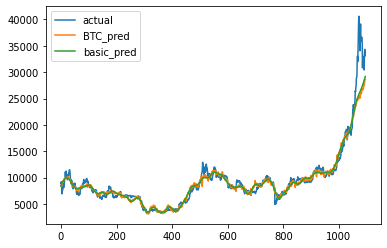

In [47]:
plt.plot(basic_df["y"], label="actual")
plt.plot(augmento_forecast["yhat"], label="BTC_pred")
plt.plot(forecast["yhat"], label="basic_pred")
plt.legend()

check here why is there a break from test plot

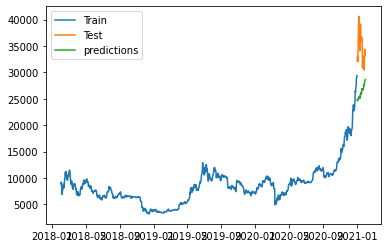

In [50]:
plt.plot(augmento_df_train['ds'], augmento_df_train['y'], label="Train")
plt.plot(augmento_df_test['ds'], augmento_df_test['y'], label="Test")
plt.plot(augmento_forecast[-horizon:]['ds'], augmento_forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")

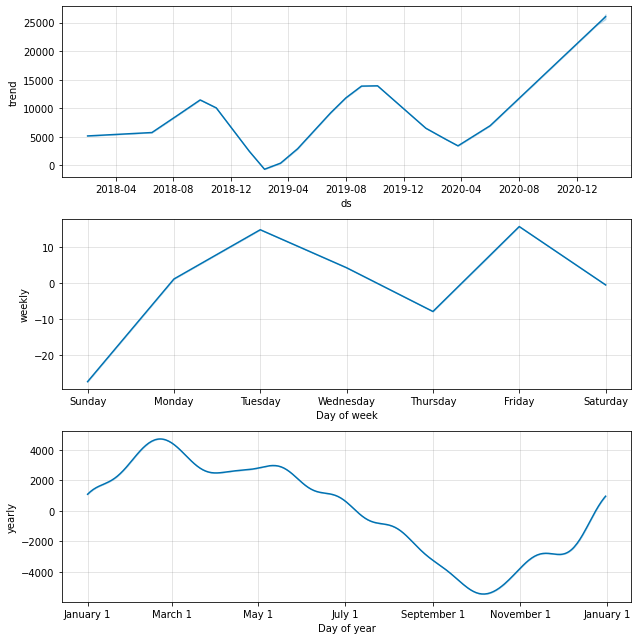

In [51]:
model.plot_components(forecast);

In [52]:
cv_results = cross_validation(model=model, initial=f'{70 * 5} days', horizon='23 days',
                              period='35 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2019-02-13 00:00:00 and 2020-12-09 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [53]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-02-14,4243.973734,3791.751566,4745.614292,3592.9100,2019-02-13
1,2019-02-15,4385.022693,3917.540068,4861.378185,3601.0583,2019-02-13
2,2019-02-16,4543.626578,4069.751831,5025.830285,3611.9750,2019-02-13
3,2019-02-17,4676.115739,4194.172322,5156.336215,3661.7417,2019-02-13
4,2019-02-18,4804.356229,4314.679567,5268.117963,3905.7433,2019-02-13
...,...,...,...,...,...,...
455,2020-12-28,16484.962306,15431.802305,17616.092242,27041.8667,2020-12-09
456,2020-12-29,16589.812669,15376.375302,17728.064822,27353.9783,2020-12-09
457,2020-12-30,16667.002322,15516.453991,17795.348745,28886.0400,2020-12-09
458,2020-12-31,16732.100799,15580.332965,17861.870515,28956.2650,2020-12-09


In [54]:
performance_metrics(cv_results)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,1.374242e+06,1172.280501,931.065672,0.111102,0.097737,0.519565
1,4 days,1.652195e+06,1285.377325,1017.730377,0.121263,0.105267,0.506522
2,5 days,1.925164e+06,1387.502962,1117.294107,0.131361,0.112122,0.450000
3,6 days,2.131865e+06,1460.090652,1212.934314,0.140951,0.115317,0.376087
4,7 days,2.838123e+06,1684.673040,1376.657234,0.156286,0.133599,0.306522
5,8 days,4.403103e+06,2098.357106,1597.381407,0.184725,0.135133,0.284783
6,9 days,5.476069e+06,2340.100233,1700.787886,0.197266,0.144019,0.271739
7,10 days,6.047188e+06,2459.103146,1744.924047,0.199195,0.140799,0.278261
8,11 days,6.347436e+06,2519.411899,1814.590060,0.207179,0.150537,0.271739
9,12 days,6.361164e+06,2522.134790,1862.180049,0.216982,0.159576,0.234783
